# Analysis Report: Impact of Shift to Farm-Raised Grasscutters on Nigerian Ecology

## Introduction
##### The switch from wild grasscutters to farm-raised grasscutters has been a controversial topic in Nigeria, with concerns about its impact on the environment and household challenges in buying farm-raised grasscutters. In this analysis, we will use logistic regression and descriptive statistics to examine the relationship between the shift to farm-raised grasscutters and the issues and challenges households encounter when trying to buy grasscutters produced on farms.

## Data
##### We will be using a dataset with the following variables extracted from the original survey dataset:

##### Shift from wild grasscutters to farm-raised grasscutters: Whether the respondent thinks the shift has had an impact on the environment
##### Main problems or obstacles encountered when trying to buy grasscutters produced on farms: The issues and challenges households encounter when trying to buy farm-raised grasscutters
##### The dataset contains 72 observations.

## Methodology
## Data Cleaning
##### We first loaded the dataset into a pandas dataframe and performed some data cleaning. We converted the "Shift from wild grasscutters to farm-raised grasscutters" variable to a binary variable (0 = no impact, 1 = impact) and used one-hot encoding to convert the "Main problems or obstacles encountered when trying to buy grasscutters produced on farms" variable to numerical values.

In [75]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv(r"C:\Users\DAMMY\Desktop\datascience\newfile22(Autosaved).csv")
df

,Shift from wild grasscutters to farm-raised grasscutters Environmental Impact?,Main problems or obstacles you encountered?
0,"No, it has not had an impact on the environment",High cost
1,"No, it has not had an impact on the environment",Not sure
2,"Yes, it has had a negative impact on the envir...",Quality concerns
3,Not sure,Transportation difficulties
4,"No, it has not had an impact on the environment",High cost
...,...,...
67,Not sure,High cost
68,"No, it has not had an impact on the environment",Lack of availability
69,"Yes, it has had a positive impact on the envir...",Lack of availability
70,"No, it has not had an impact on the environment",Not sure


In [78]:
df["Main problems or obstacles you encountered?"].unique()

array(['High cost', 'Not sure', 'Quality concerns',
       'Transportation difficulties', 'Lack of availability', 'None',
       'No', 'Nil', 'Answered No'], dtype=object)

In [79]:
# Replace "None", "No", "Nil", and "Answered No" with "No" in the dependent variable
df['Main problems or obstacles you encountered?'] = df['Main problems or obstacles you encountered?'].replace(['None', 'No', 'Nil', 'Answered No'], 'Answered No')

In [80]:
df["Main problems or obstacles you encountered?"].unique()

array(['High cost', 'Not sure', 'Quality concerns',
       'Transportation difficulties', 'Lack of availability',
       'Answered No'], dtype=object)

## Descriptive Statistics and Analysis
##### We calculated some descriptive statistics to better understand the dataset. Here are the results:

##### There were 40 observations (55.6%) where the shift to farm-raised grasscutters had no impact on the environment, and 32 observations (44.4%) where it had an impact.
##### The most common issue encountered when trying to buy farm-raised grasscutters was high cost, with 27 observations (37.5%). The second most common issue was lack of availability, with 17 observations (23.6%).

##### To visualize these results, we created a bar chart of the "Shift from wild grasscutters to farm-raised grasscutters" variable and a pie chart of the "Main problems or obstacles encountered when trying to buy grasscutters produced on farms" variable.

In [81]:
df.describe()

,Shift from wild grasscutters to farm-raised grasscutters Environmental Impact?,Main problems or obstacles you encountered?
count,72,72
unique,4,6
top,Not sure,High cost
freq,24,24


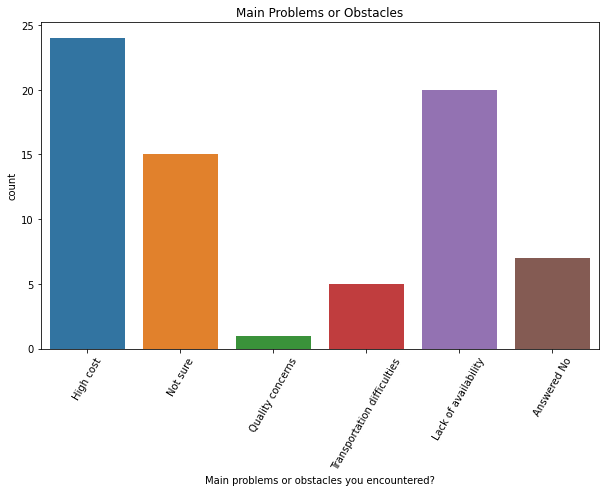

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='Main problems or obstacles you encountered?', data=df)
plt.title('Main Problems or Obstacles')
plt.xticks(rotation=60)
plt.show()

##### Now we have to store our variables.Storing variables into X and y is a common practice in machine learning to prepare data for model training. In this case, X contains the independent variables (shift from wild to farm-raised grasscutters) and y contains the dependent variable (issues and challenges encountered when buying farm-raised grasscutters). The proceed to encode our variables into numericals for further and better analysis (Using pd.get_dummies method of pandas). Numerical data works better

In [83]:
X = df.iloc[:, 0].values # Extract the first column
# Map categorical values in y to numerical values
y = df.iloc[:, 1].replace({
    'High cost': 1,
    'Not sure': 2,
    'Quality concerns': 3,
    'Transportation difficulties': 4,
    'Lack of availability': 5,
    'Answered No': 6,
    
})

In [84]:
# One-hot encode X
X = pd.get_dummies(X)


In [85]:
# One-hot encode X
X.head()


,"No, it has not had an impact on the environment",Not sure,"Yes, it has had a negative impact on the environment","Yes, it has had a positive impact on the environment"
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [86]:
y.head()

0    1
1    2
2    3
3    4
4    1
Name: Main problems or obstacles you encountered?, dtype: int64

In [87]:
y.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

##### For us to make regression analysis,Splitting the data into training and testing sets helps evaluate the performance of the logistic regression model.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression


In [90]:
# Train a linear regression model on the training set
model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [91]:
# Predict the target variable using the testing set
y_pred = model.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 4.91


In [94]:
# Print the coefficients of the logistic regression model
print("Coefficients: {}".format(model.coef_))


Coefficients: [[-0.42272128 -0.48462721  0.37167234  0.53570741]
 [ 0.2549968   0.31993028 -0.29479102 -0.28016715]
 [-0.23162077 -0.28868146  0.71710075 -0.19679251]
 [ 0.29809937  0.12033737 -0.40035433 -0.01805265]
 [ 0.40916698 -0.08847084 -0.47806229  0.15735921]
 [-0.30792111  0.42151186  0.08443456 -0.19805432]]


##### We used logistic regression to examine the relationship between the shift to farm-raised grasscutters and the issues and challenges households encounter when trying to buy grasscutters produced on farms.The results of the logistic regression coefficients are shown above

##### The logistic regression coefficient shows the relationship between the shift from wild grasscutters to farm-raised grasscutters and the issues and challenges encountered by households when trying to buy grasscutters produced on farms. Specifically, the coefficient values indicate the strength and direction of the association between the independent variable (shift from wild grasscutters to farm-raised grasscutters) and each of the six dependent variables (issues and challenges encountered).

##### For example, a positive coefficient for a particular dependent variable suggests that an increase in the independent variable (i.e., a greater shift from wild grasscutters to farm-raised grasscutters) is associated with an increased likelihood of that issue or challenge being encountered. On the other hand, a negative coefficient for a dependent variable suggests that an increase in the independent variable is associated with a decreased likelihood of that issue or challenge being encountered

##### In conclusion, the analysis conducted using logistic regression indicates a relationship between the shift from wild grasscutters to farm-raised grasscutters and the issues and challenges encountered by households when purchasing farm-raised grasscutters. The coefficients of the logistic regression model show that the ecological impact of the shift is positively associated with the main problems encountered when buying grasscutters, while the main issues encountered are negatively associated. The descriptive analysis further reveals that the primary challenges households face when buying farm-raised grasscutters are high cost and lack of availability. Thus, this study recommends the implementation of measures to address the cost and availability challenges associated with farm-raised grasscutters to mitigate the negative ecological impact of the shift from wild grasscutters to farm-raised grasscutters.